# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "api.openweathermap.org/data/2.5/weather?q={city name},{state code}&appid={API key}"

base_url = "http://api.openweathermap.org/data/2.5/weather?"
# base_url + api key parameter + my api key + units of measure + city query
query_url = base_url + "&appid=" + weather_api_key + "&units=imperial" + "&q="


In [4]:
# create list for each column(series)
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# build for a for loop
for i in cities:
    try: 
        city_info = requests.get(query_url + i).json()
        print(f'Processing record')
        city_name.append(city_info['name'])
        latitude.append(city_info['coord']['lat'])
        longitude.append(city_info['coord']['lon'])
        max_temp.append(city_info['main']['temp_max'])
        humidity.append(city_info['main']['humidity'])
        cloudiness.append(city_info['clouds']['all'])
        wind_speed.append(city_info['wind']['speed'])
        country.append(city_info['sys']['country'])
        date.append(city_info['dt'])
    except KeyError:
        print("City not found")
    

Processing record
City not found
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
City not found
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
City not found
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
City not found
Processing record
City not found
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
City not found
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
City not found
Processing record
Processing record
Processing record
Processing record
Processing record
Processing record
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame({"City": city_name,
   "Latitude": latitude,
   "Longitude": longitude,
   "Max Temp": max_temp,
   "Humidity": humidity,
   "Cloudiness": cloudiness,
   "Wind Speed": wind_speed,
   "Country": country,
   "Date": date})

city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,20.70,96,100,6.64,GL,1605397932
1,Qaanaaq,77.48,-69.36,7.52,80,93,13.62,GL,1605397932
2,Ushuaia,-54.80,-68.30,42.80,79,75,9.37,AR,1605397932
3,Saskylakh,71.92,114.08,3.33,92,89,14.99,RU,1605397933
4,Norman Wells,65.28,-126.83,-5.80,83,75,2.24,CA,1605397867


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#city_data_df1 = city_data[city_data['Humidity'] < 100]
city_data_df1 = city_data.loc[:, 'Humidity'] > 100
city_data_df1.head()
#There are no cities with humidity > 100%

0    False
1    False
2    False
3    False
4    False
Name: Humidity, dtype: bool

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
city_latitude = city_data['Latitude']
city_latitude

0      65.61
1      77.48
2     -54.80
3      71.92
4      65.28
       ...  
558   -25.23
559   -12.04
560    25.02
561    18.73
562    11.52
Name: Latitude, Length: 563, dtype: float64

In [14]:
city_maxtemp = city_data['Max Temp']
city_maxtemp

0      20.70
1       7.52
2      42.80
3       3.33
4      -5.80
       ...  
558    67.78
559    66.20
560    73.51
561    78.80
562    77.18
Name: Max Temp, Length: 563, dtype: float64

The graph shows that cities with higher latitudes have lower max recorded temperatures.


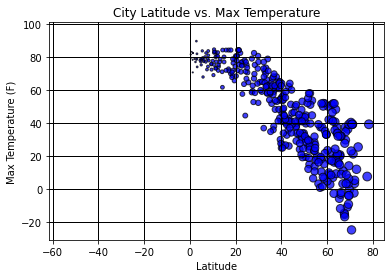

In [64]:
plt.scatter(city_latitude, city_maxtemp, marker='o', facecolors="blue", edgecolors="black",
            s=city_latitude, alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_max_temp.png")
print("The graph shows that cities with higher latitudes have lower max recorded temperatures.")

## Latitude vs. Humidity Plot

In [23]:
city_humidity = city_data['Humidity']
city_humidity

0      96
1      80
2      79
3      92
4      83
       ..
558    73
559    77
560    67
561    78
562    21
Name: Humidity, Length: 563, dtype: int64

The plot shows that cities at a higher latitude have higher percentage of humidity.


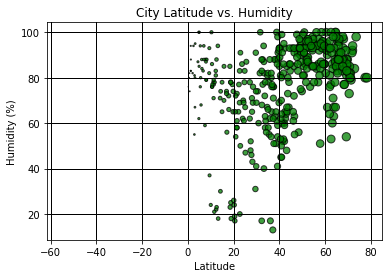

In [65]:
plt.scatter(city_latitude, city_humidity, marker='o', facecolors="green", edgecolors="black",
            s=city_latitude, alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_humidity.png")
print("The plot shows that cities at a higher latitude have higher percentage of humidity.")

## Latitude vs. Cloudiness Plot

In [25]:
city_cloudiness = city_data['Cloudiness']
city_cloudiness

0      100
1       93
2       75
3       89
4       75
      ... 
558     13
559     40
560      0
561     40
562     95
Name: Cloudiness, Length: 563, dtype: int64

The plot shows that cities closer to the equator have less percentage of cloudiness compared to cities with higher latitude.


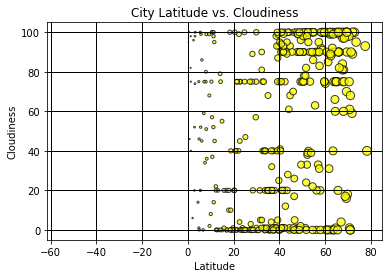

In [66]:
plt.scatter(city_latitude, city_cloudiness, marker='o', facecolors="yellow", edgecolors="black",
            s=city_latitude, alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_cloudiness.png")
print("The plot shows that cities closer to the equator have less percentage of cloudiness compared to cities with higher latitude.")

## Latitude vs. Wind Speed Plot

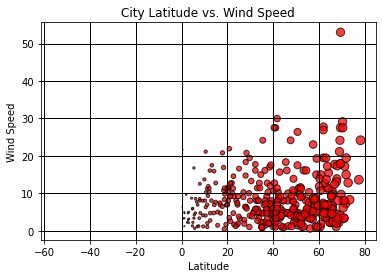

In [28]:
city_windspeed = city_data['Wind Speed']
plt.scatter(city_latitude, city_windspeed, marker='o', facecolors="red", edgecolors="black",
            s=city_latitude, alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_wind_speed.png")
print("The plot show that as latitude increases, wind speed also increases, therefore they are directly proportional.")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5270900885549267


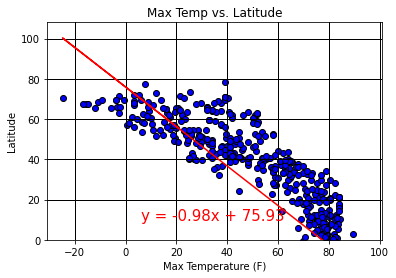

In [71]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_maxtemp, city_latitude)
regress_values = city_maxtemp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(city_maxtemp,city_latitude, marker='o', facecolors="blue", edgecolors="black")
plt.plot(city_maxtemp,regress_values,"r-")
plt.ylim(bottom=0)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title("Max Temp vs. Latitude")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_north_max_temp_regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5270900885549267
The plot shows that cities closer to the equator (0 degrees Latitude) have higher temperatures. The linear regression is modeling that latitude and temperature may have an inverse relationship.


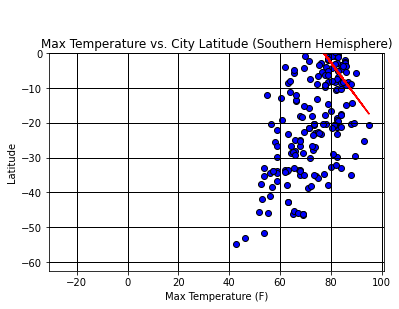

In [73]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_maxtemp, city_latitude)
regress_values = city_maxtemp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(city_maxtemp,city_latitude, marker='o', facecolors="blue", edgecolors="black")
plt.plot(city_maxtemp,regress_values,"r-")
plt.ylim(top=0)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.title("Max Temperature vs. City Latitude (Southern Hemisphere)")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_south_max_temp_regression.png")
print(f"The r-squared is: {rvalue**2}")
print("The plot shows that cities closer to the equator (0 degrees Latitude) have higher temperatures. The linear regression is modeling that latitude and temperature may have an inverse relationship.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09841531064745476


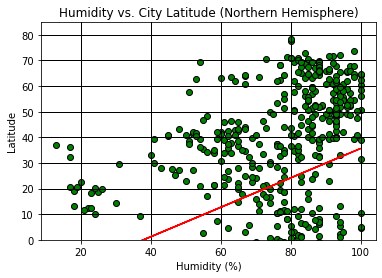

In [76]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_humidity, city_latitude)
regress_values = city_humidity * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(city_humidity,city_latitude, marker='o', facecolors="green", edgecolors="black")
plt.plot(city_humidity,regress_values,"r-")
plt.ylim(bottom=0)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Humidity vs. City Latitude (Northern Hemisphere)")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_north_humidity_regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09841531064745476
Plots show that there is less humidity closer to the equator. Linear regression shows that humidity and latitude may have a positive relationship, where as latitudes increase north or south, humidity also increases.


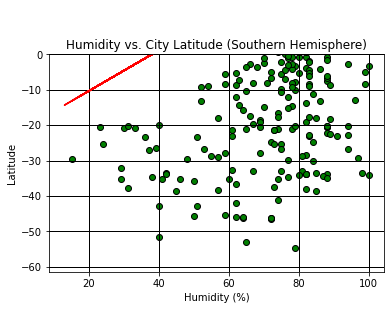

In [78]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_humidity, city_latitude)
regress_values = city_humidity * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(city_humidity,city_latitude, marker='o', facecolors="green", edgecolors="black")
plt.plot(city_humidity,regress_values,"r-")
plt.ylim(top=0)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title("Humidity vs. City Latitude (Southern Hemisphere)")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_south_humidity_regression.png")
print(f"The r-squared is: {rvalue**2}")
print("Plots show that there is less humidity closer to the equator. Linear regression shows that humidity and latitude may have a positive relationship, where as latitudes increase north or south, humidity also increases.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.022457161720155945


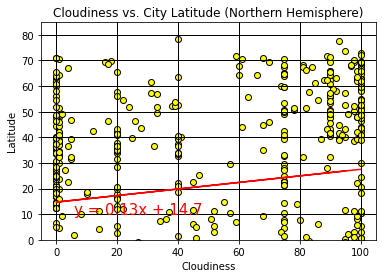

In [79]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_cloudiness, city_latitude)
regress_values = city_cloudiness * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(city_cloudiness,city_latitude, marker='o', facecolors="yellow", edgecolors="black")
plt.plot(city_cloudiness,regress_values,"r-")
plt.ylim(bottom=0)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Cloudiness vs. City Latitude (Northern Hemisphere)")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_north_cloudiness_regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.022457161720155945
Plots appear to be pretty uniform. Linear regression shows there may be a direct relationship between latitude and percentage of clouds.


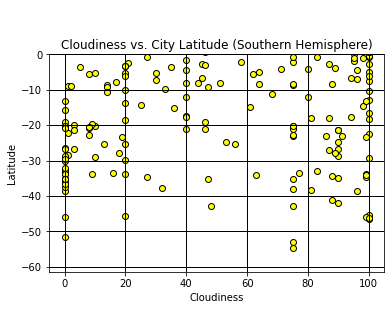

In [84]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_cloudiness, city_latitude)
regress_values = city_cloudiness * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(city_cloudiness,city_latitude, marker='o', facecolors="yellow", edgecolors="black")
plt.plot(city_cloudiness,regress_values,"r-")
plt.ylim(top=0)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Cloudiness vs. City Latitude (Southern Hemisphere)")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_south_cloudiness_regression.png")
print(f"The r-squared is: {rvalue**2}")
print("Plots appear to be pretty uniform. Linear regression shows there may be a direct relationship between latitude and percentage of clouds.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0016243687371199356


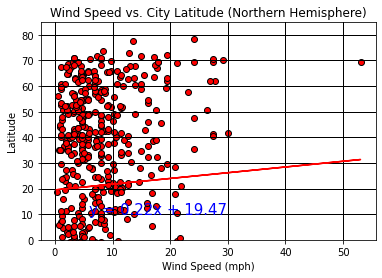

In [82]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_windspeed, city_latitude)
regress_values = city_windspeed * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(city_windspeed,city_latitude, marker='o', facecolors="red", edgecolors="black")
plt.plot(city_windspeed,regress_values,"r-")
plt.ylim(bottom=0)
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Wind Speed vs. City Latitude (Northern Hemisphere)")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_north_wind_speed_regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0016243687371199356
Plots show that low wind speeds appear to be the same at either sides of the equator (north or south). There are a few outliers at highest and lowest latitudes with high wind speeds. Linear regression tells us there may be a direct relationship between latitude and wind speeds.


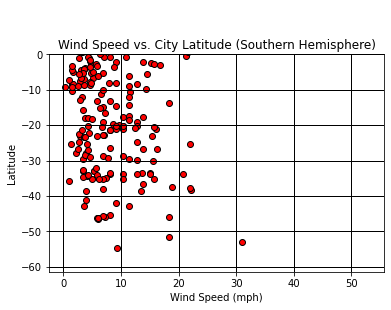

In [85]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_windspeed, city_latitude)
regress_values = city_windspeed * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(city_windspeed,city_latitude, marker='o', facecolors="red", edgecolors="black")
plt.plot(city_windspeed,regress_values,"r-")
plt.ylim(top=0)
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("Wind Speed vs. City Latitude (Southern Hemisphere)")
plt.grid(axis='both', color='black', linestyle='-', linewidth=1)
plt.savefig("../Images/city_latitude_vs_south_wind_speed_regression.png")
print(f"The r-squared is: {rvalue**2}")
print("Plots show that low wind speeds appear to be the same at either sides of the equator (north or south). There are a few outliers at highest and lowest latitudes with high wind speeds. Linear regression tells us there may be a direct relationship between latitude and wind speeds.")
plt.show()

In [61]:
city_data.to_csv(r'../WeatherPy/weather_py_city_data.csv', index = False)